<a href="https://colab.research.google.com/github/anggad08/DMC_ML_COURSE/blob/main/MLTRABAJO_FINAL_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores Hiperparámetros encontrados por Grid Search:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Resultados con los mejores hiperparámetros:
              precision    recall  f1-score   support

           3       0.93      0.97      0.95       461
           4       0.84      0.86      0.85       461
           5       0.63      0.64      0.63       461
           6       0.56      0.49      0.52       462
           7       0.71      0.69      0.70       462
           8       0.82      0.88      0.85       461
           9       1.00      1.00      1.00       462

    accuracy                           0.79      3230
   macro avg       0.78      0.79      0.79      3230
weighted avg       0.78      0.79      0.79      3230



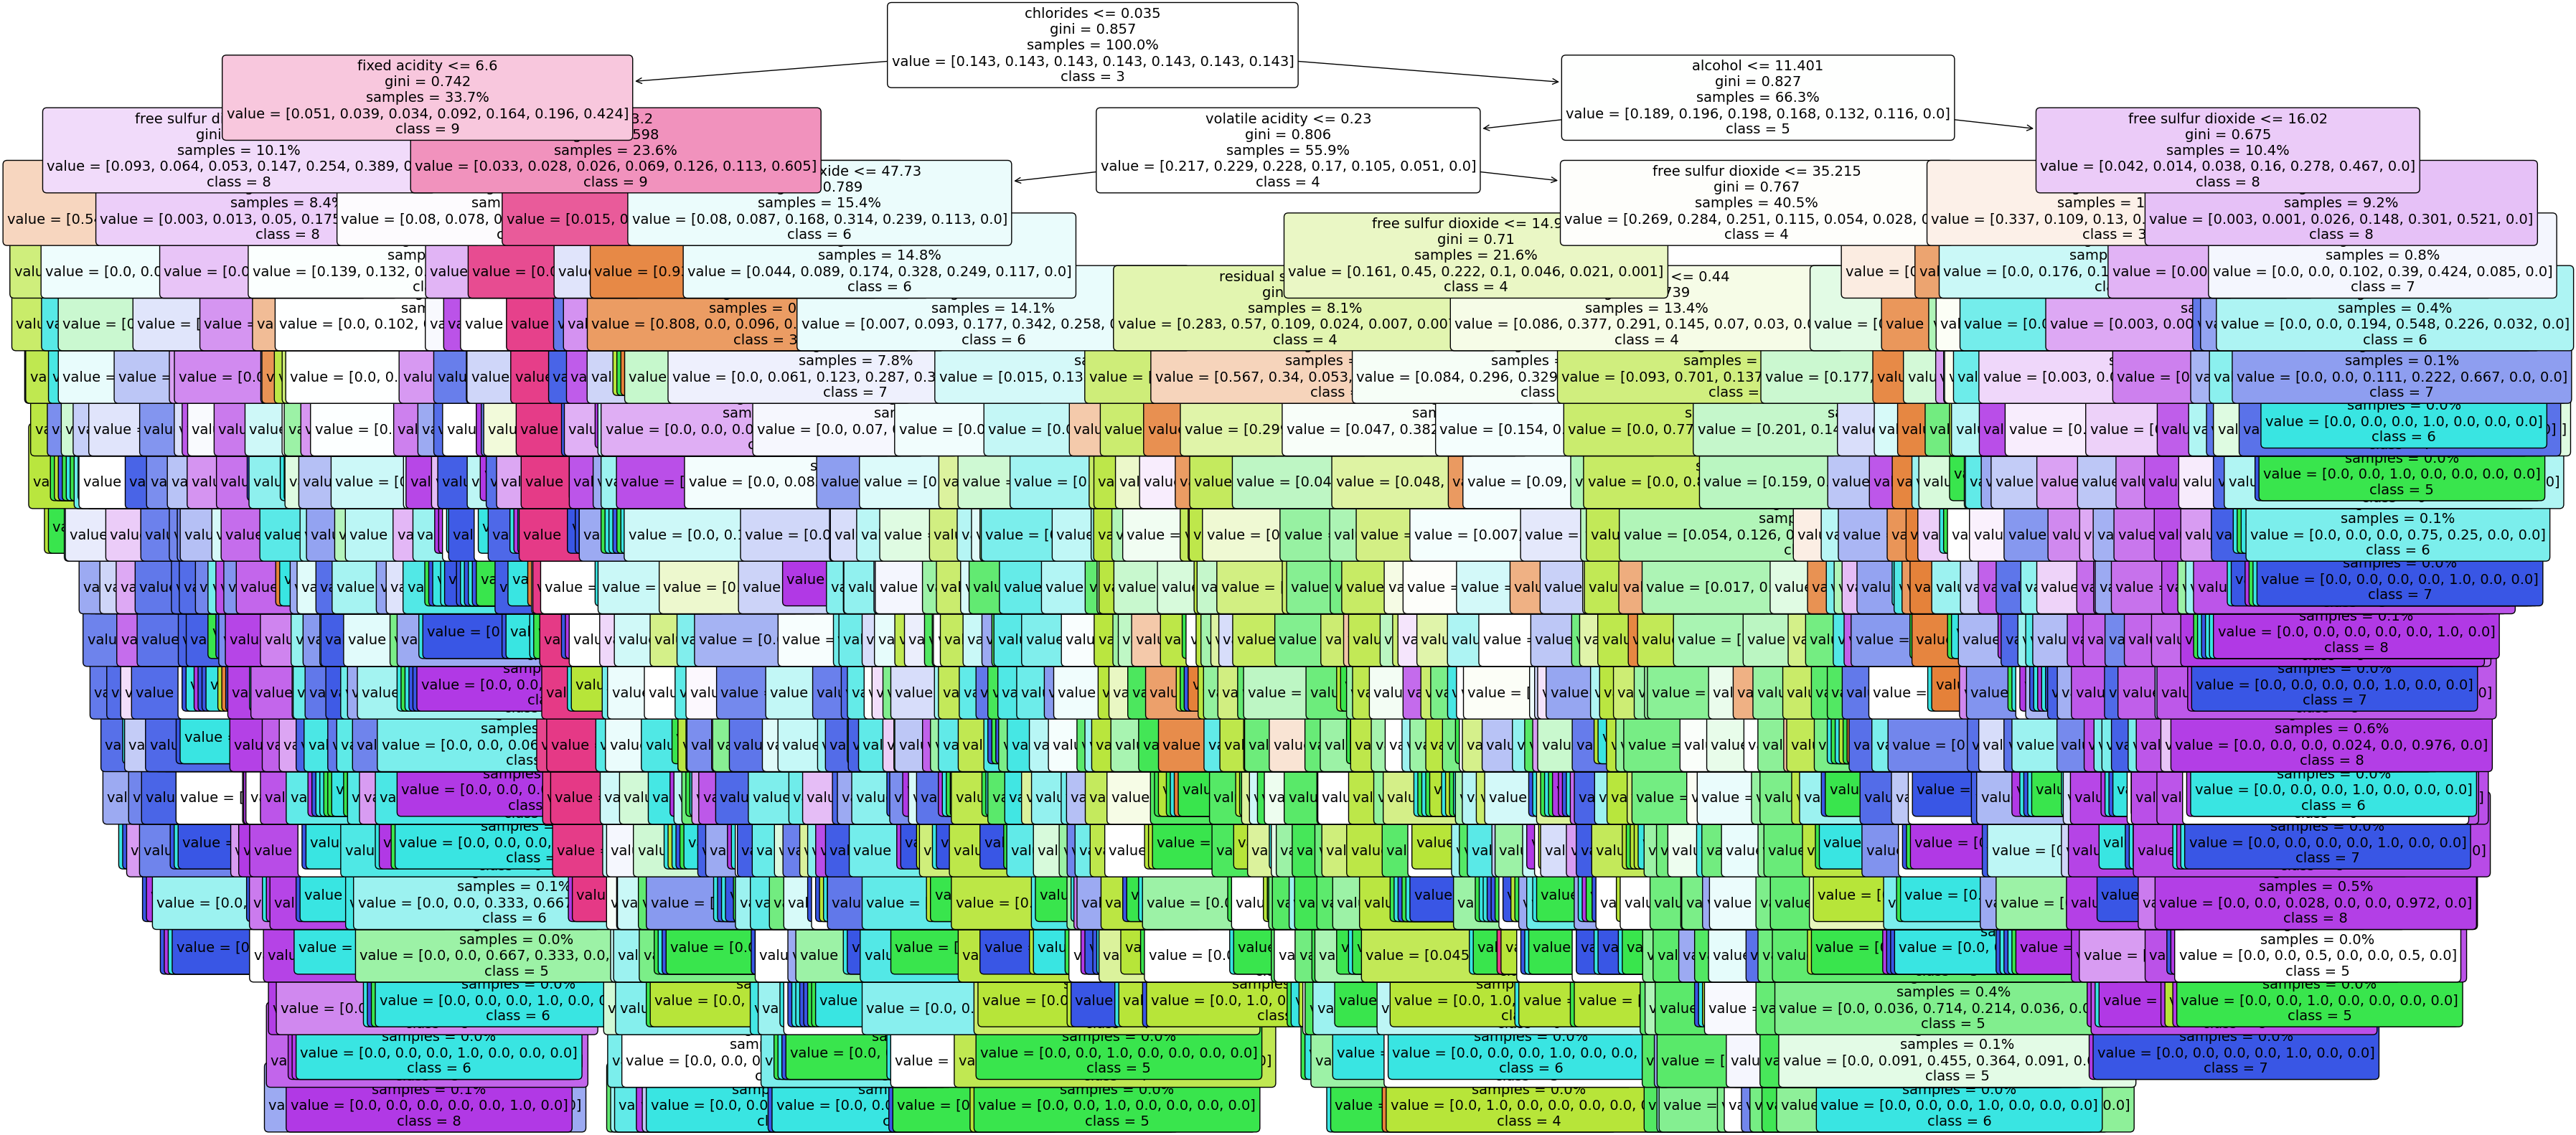

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Cargar el dataset balanceado
file_path = 'wine-quality-white-balanced.csv'
balanced_data = pd.read_csv(file_path)

# Separar características y etiquetas
X = balanced_data.drop('quality', axis=1)
y = balanced_data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir el modelo
clf = DecisionTreeClassifier(random_state=42)

# Definir los parámetros para la búsqueda
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Entrenar el modelo usando la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mejor estimador
best_clf = grid_search.best_estimator_

# Predecir y evaluar el modelo con los mejores hiperparámetros
y_pred_best = best_clf.predict(X_test)
print("Mejores Hiperparámetros encontrados por Grid Search:")
print(grid_search.best_params_)
print("Resultados con los mejores hiperparámetros:")
print(classification_report(y_test, y_pred_best))

# Visualización del árbol de decisión
plt.figure(figsize=(40, 20))
tree.plot_tree(best_clf,
               filled=True,
               feature_names=X.columns,
               class_names=[str(i) for i in best_clf.classes_],
               rounded=True,
               fontsize=14,
               proportion=True)
plt.show()

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores Hiperparámetros encontrados por Grid Search para Random Forest:
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Resultados con los mejores hiperparámetros para Random Forest:
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       461
           4       0.91      0.98      0.94       461
           5       0.77      0.77      0.77       461
           6       0.73      0.60      0.66       462
           7       0.80      0.86      0.83       462
           8       0.93      0.97      0.95       461
           9       1.00      1.00      1.00       462

    accuracy                           0.88      3230
   macro avg       0.88      0.88      0.88      3230
weighted avg       0.88      0.88      0.88      3230



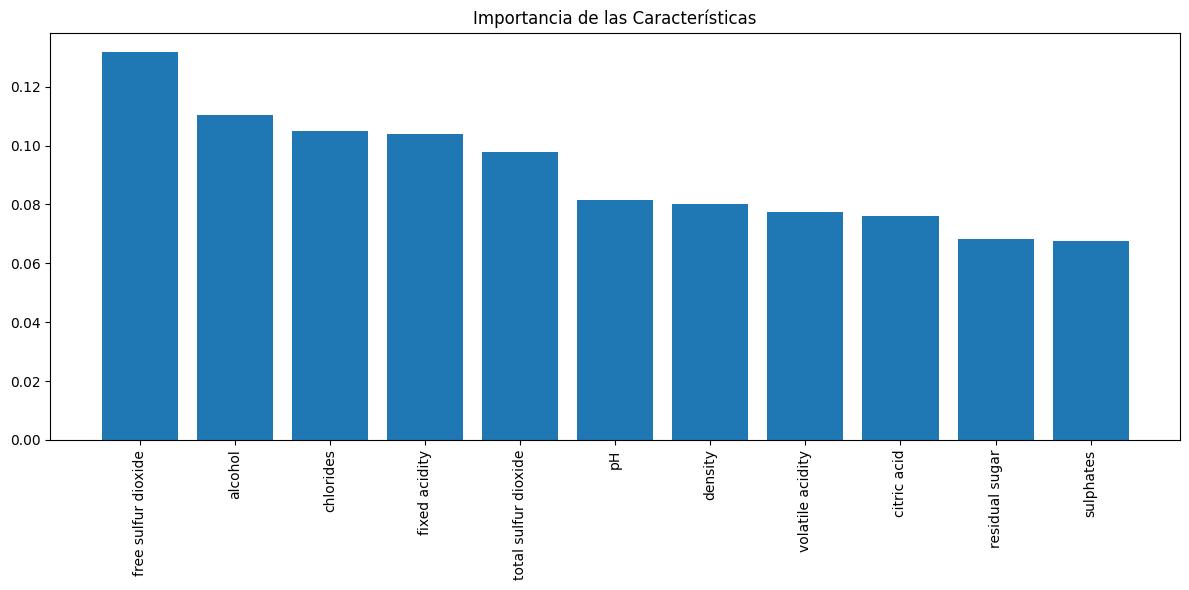

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset balanceado
file_path = 'wine-quality-white-balanced.csv'
balanced_data = pd.read_csv(file_path)

# Separar características y etiquetas
X = balanced_data.drop('quality', axis=1)
y = balanced_data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir el modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Definir los parámetros para la búsqueda
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Entrenar el modelo usando la búsqueda de hiperparámetros
grid_search_rf.fit(X_train, y_train)

# Mejor estimador
best_rf_clf = grid_search_rf.best_estimator_

# Predecir y evaluar el modelo con los mejores hiperparámetros
y_pred_rf_best = best_rf_clf.predict(X_test)
print("Mejores Hiperparámetros encontrados por Grid Search para Random Forest:")
print(grid_search_rf.best_params_)
print("Resultados con los mejores hiperparámetros para Random Forest:")
print(classification_report(y_test, y_pred_rf_best))

# Obtener la importancia de las características del mejor modelo
importances = best_rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Visualización de la importancia de las características
plt.figure(figsize=(12, 6))
plt.title("Importancia de las Características")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
!pip install tqdm




Dataset cargado correctamente.
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.32         0.24             6.2      0.048   
1            6.0              0.28         0.27            15.5      0.036   
2            6.8              0.31         0.19             3.5      0.086   
3            6.9              0.25         0.34             1.3      0.035   
4            6.1              0.19         0.25             4.0      0.023   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 31.0                 228.0  0.99570  3.23       0.62   
1                 31.0                 134.0  0.99408  3.19       0.44   
2                 30.0                 130.0  0.99300  2.83       0.44   
3                 27.0                  82.0  0.99045  3.18       0.44   
4                 23.0                 112.0  0.99230  3.37       0.51   

   alcohol  quality  
0      9.4        6  
1     13.0 


Grid Search Progress:   0%|          | 1/243 [12:39<51:01:43, 759.11s/it]

Mejores Hiperparámetros encontrados por Grid Search para XGBoost:
{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 300}
Resultados con los mejores hiperparámetros para XGBoost:
              precision    recall  f1-score   support

           3       0.99      1.00      0.99       478
           4       0.94      0.97      0.95       453
           5       0.77      0.74      0.76       474
           6       0.67      0.65      0.66       443
           7       0.82      0.81      0.82       458
           8       0.92      0.96      0.94       446
           9       1.00      1.00      1.00       478

    accuracy                           0.88      3230
   macro avg       0.87      0.88      0.87      3230
weighted avg       0.87      0.88      0.88      3230



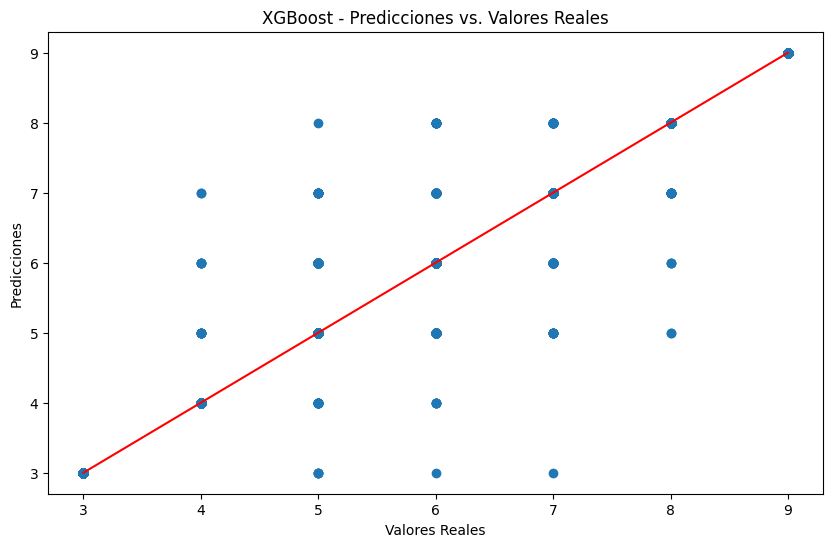

Tiempo total de ejecución: 759.13 segundos


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

# Cargar el dataset balanceado
file_path = 'wine-quality-white-balanced.csv'

try:
    data = pd.read_csv(file_path)
    print("Dataset cargado correctamente.")
    print(data.head())
except FileNotFoundError:
    print(f"El archivo {file_path} no se encuentra en la ruta especificada.")
    raise
except pd.errors.EmptyDataError:
    print(f"El archivo {file_path} está vacío.")
    raise
except pd.errors.ParserError:
    print(f"Error al analizar el archivo {file_path}.")
    raise
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo {file_path}: {e}")
    raise

# Separar características y etiquetas
X = data.drop('quality', axis=1)
y = data['quality']

# Convertir las etiquetas a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Definir el modelo de XGBoost
xgb_clf = XGBClassifier(random_state=42)

# Definir los parámetros para la búsqueda
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 2, 4]
}

# Crear el objeto GridSearchCV sin paralelización
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=3, n_jobs=1, verbose=0)

# Envolviendo fit con tqdm para ver el progreso
def fit_with_progress(grid_search, X_train, y_train):
    n_candidates = len(param_grid_xgb['n_estimators']) * len(param_grid_xgb['learning_rate']) * len(param_grid_xgb['max_depth']) * len(param_grid_xgb['min_child_weight'])
    cv = grid_search.cv if grid_search.cv is not None else 5
    total_fits = n_candidates * cv
    pbar = tqdm(total=total_fits, desc="Grid Search Progress")

    original_fit = grid_search.fit

    def fit(X, y, **kwargs):
        result = original_fit(X, y, **kwargs)
        pbar.update(1)
        return result

    grid_search.fit = fit
    return grid_search

# Entrenar el modelo usando la búsqueda de hiperparámetros
start_time = time.time()
grid_search_xgb = fit_with_progress(grid_search_xgb, X_train, y_train)
grid_search_xgb.fit(X_train, y_train)
end_time = time.time()

# Mejor estimador
best_xgb_clf = grid_search_xgb.best_estimator_

# Predecir y evaluar el modelo con los mejores hiperparámetros
y_pred_xgb_best = best_xgb_clf.predict(X_test)
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_xgb_best_decoded = label_encoder.inverse_transform(y_pred_xgb_best)

print("Mejores Hiperparámetros encontrados por Grid Search para XGBoost:")
print(grid_search_xgb.best_params_)
print("Resultados con los mejores hiperparámetros para XGBoost:")
print(classification_report(y_test_decoded, y_pred_xgb_best_decoded))

# Visualización de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test_decoded, y_pred_xgb_best_decoded)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("XGBoost - Predicciones vs. Valores Reales")
plt.plot([min(y_test_decoded), max(y_test_decoded)], [min(y_test_decoded), max(y_test_decoded)], color='red')  # Línea de identidad
plt.show()

# Tiempo total de ejecución
total_time = end_time - start_time
print(f"Tiempo total de ejecución: {total_time:.2f} segundos")

Dataset cargado correctamente.
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.32         0.24             6.2      0.048   
1            6.0              0.28         0.27            15.5      0.036   
2            6.8              0.31         0.19             3.5      0.086   
3            6.9              0.25         0.34             1.3      0.035   
4            6.1              0.19         0.25             4.0      0.023   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 31.0                 228.0  0.99570  3.23       0.62   
1                 31.0                 134.0  0.99408  3.19       0.44   
2                 30.0                 130.0  0.99300  2.83       0.44   
3                 27.0                  82.0  0.99045  3.18       0.44   
4                 23.0                 112.0  0.99230  3.37       0.51   

   alcohol  quality  
0      9.4        6  
1     13.0 

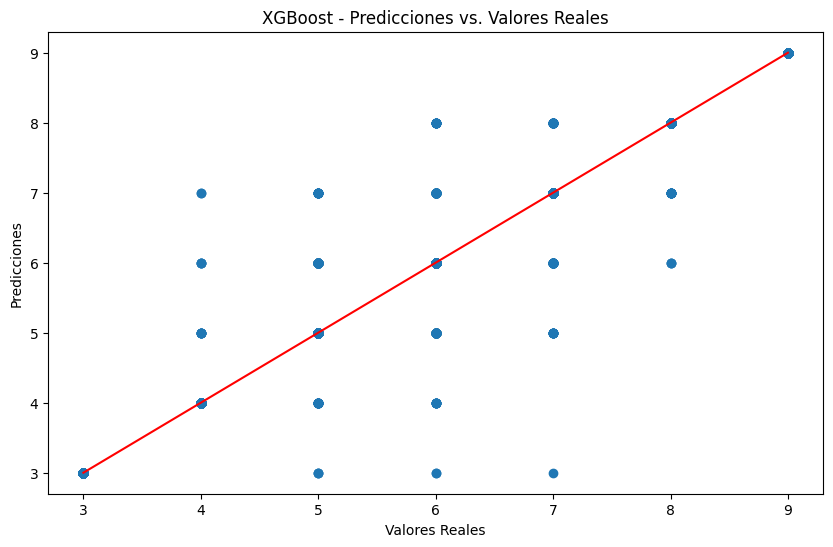

Tiempo total de ejecución: 564.93 segundos


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import uniform, randint
import time

# Cargar el dataset balanceado
file_path = 'wine-quality-white-balanced.csv'

try:
    data = pd.read_csv(file_path)
    print("Dataset cargado correctamente.")
    print(data.head())
except FileNotFoundError:
    print(f"El archivo {file_path} no se encuentra en la ruta especificada.")
    raise
except pd.errors.EmptyDataError:
    print(f"El archivo {file_path} está vacío.")
    raise
except pd.errors.ParserError:
    print(f"Error al analizar el archivo {file_path}.")
    raise
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo {file_path}: {e}")
    raise

# Separar características y etiquetas
X = data.drop('quality', axis=1)
y = data['quality']

# Convertir las etiquetas a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Verificar que no haya valores nulos
if X_train.isnull().sum().sum() > 0 or np.isnan(y_train).sum() > 0:
    raise ValueError("Hay valores nulos en los datos de entrenamiento.")

# Definir el modelo de XGBoost
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Definir los parámetros para la búsqueda
param_dist_xgb = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 7),
    'min_child_weight': randint(1, 4),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Crear el objeto RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist_xgb, n_iter=100, cv=3, n_jobs=-1, verbose=2, error_score='raise')

# Entrenar el modelo usando la búsqueda de hiperparámetros
start_time = time.time()
try:
    random_search_xgb.fit(X_train, y_train)
except ValueError as e:
    print(f"Error durante el ajuste: {e}")
    for i, params in enumerate(random_search_xgb.cv_results_['params']):
        print(f"Parámetros {i}: {params}")
        print(f"Resultados: {random_search_xgb.cv_results_['mean_test_score'][i]}")
end_time = time.time()

# Mejor estimador
if random_search_xgb.best_estimator_:
    best_xgb_clf = random_search_xgb.best_estimator_

    # Validación cruzada con el mejor estimador
    cv_scores = cross_val_score(best_xgb_clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Validación Cruzada - Accuracy Scores:", cv_scores)
    print("Validación Cruzada - Accuracy Mean:", cv_scores.mean())

    # Predecir y evaluar el modelo con los mejores hiperparámetros
    y_pred_xgb_best = best_xgb_clf.predict(X_test)
    y_test_decoded = label_encoder.inverse_transform(y_test)
    y_pred_xgb_best_decoded = label_encoder.inverse_transform(y_pred_xgb_best)

    print("Mejores Hiperparámetros encontrados por Random Search para XGBoost:")
    print(random_search_xgb.best_params_)
    print("Resultados con los mejores hiperparámetros para XGBoost:")
    print(classification_report(y_test_decoded, y_pred_xgb_best_decoded))

    # Visualización de las predicciones vs. valores reales
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_decoded, y_pred_xgb_best_decoded)
    plt.xlabel("Valores Reales")
    plt.ylabel("Predicciones")
    plt.title("XGBoost - Predicciones vs. Valores Reales")
    plt.plot([min(y_test_decoded), max(y_test_decoded)], [min(y_test_decoded), max(y_test_decoded)], color='red')  # Línea de identidad
    plt.show()

    # Tiempo total de ejecución
    total_time = end_time - start_time
    print(f"Tiempo total de ejecución: {total_time:.2f} segundos")
else:
    print("No se encontró un mejor estimador. Revisa los parámetros y los datos.")

Dataset cargado correctamente.
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.32         0.24             6.2      0.048   
1            6.0              0.28         0.27            15.5      0.036   
2            6.8              0.31         0.19             3.5      0.086   
3            6.9              0.25         0.34             1.3      0.035   
4            6.1              0.19         0.25             4.0      0.023   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 31.0                 228.0  0.99570  3.23       0.62   
1                 31.0                 134.0  0.99408  3.19       0.44   
2                 30.0                 130.0  0.99300  2.83       0.44   
3                 27.0                  82.0  0.99045  3.18       0.44   
4                 23.0                 112.0  0.99230  3.37       0.51   

   alcohol  quality  
0      9.4        6  
1     13.0 

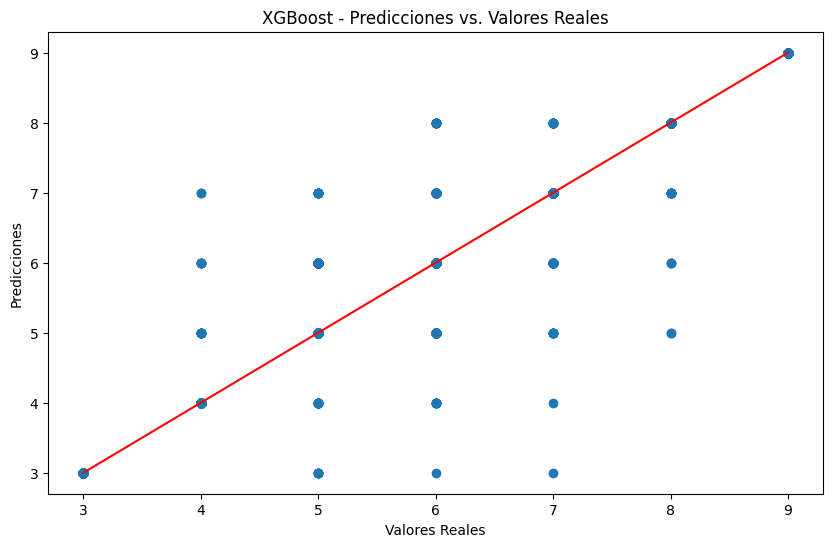

Tiempo total de ejecución: 610.37 segundos


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
import time

# Cargar el dataset balanceado
file_path = 'wine-quality-white-balanced.csv'

try:
    data = pd.read_csv(file_path)
    print("Dataset cargado correctamente.")
    print(data.head())
except FileNotFoundError:
    print(f"El archivo {file_path} no se encuentra en la ruta especificada.")
    raise
except pd.errors.EmptyDataError:
    print(f"El archivo {file_path} está vacío.")
    raise
except pd.errors.ParserError:
    print(f"Error al analizar el archivo {file_path}.")
    raise
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo {file_path}: {e}")
    raise

# Crear nuevas características
data['free_sulfur_ratio'] = data['free sulfur dioxide'] / (data['total sulfur dioxide'] + 1)
data['density_alcohol'] = data['density'] * data['alcohol']
data['sulfur_ratio'] = data['free sulfur dioxide'] / (data['chlorides'] + 1)  # Evitar división por cero

# Aplicar transformaciones logarítmicas
data_log = data.copy()
for column in data.columns:
    if column != 'quality' and (data[column] > 0).all():
        data_log[column] = np.log(data[column])

# Separar características y etiquetas
X = data_log.drop('quality', axis=1)
y = data_log['quality']

# Convertir las etiquetas a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Verificar que no haya valores nulos
if X_train.isnull().sum().sum() > 0 or np.isnan(y_train).sum() > 0:
    raise ValueError("Hay valores nulos en los datos de entrenamiento.")

# Definir el modelo de XGBoost
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Definir los parámetros para la búsqueda
param_dist_xgb = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 7),
    'min_child_weight': randint(1, 4),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Crear el objeto RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist_xgb, n_iter=100, cv=3, n_jobs=-1, verbose=2, error_score='raise')

# Entrenar el modelo usando la búsqueda de hiperparámetros
start_time = time.time()
try:
    random_search_xgb.fit(X_train, y_train)
except ValueError as e:
    print(f"Error durante el ajuste: {e}")
    for i, params in enumerate(random_search_xgb.cv_results_['params']):
        print(f"Parámetros {i}: {params}")
        print(f"Resultados: {random_search_xgb.cv_results_['mean_test_score'][i]}")
end_time = time.time()

# Mejor estimador
if random_search_xgb.best_estimator_:
    best_xgb_clf = random_search_xgb.best_estimator_

    # Validación cruzada con el mejor estimador
    cv_scores = cross_val_score(best_xgb_clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Validación Cruzada - Accuracy Scores:", cv_scores)
    print("Validación Cruzada - Accuracy Mean:", cv_scores.mean())

    # Predecir y evaluar el modelo con los mejores hiperparámetros
    y_pred_xgb_best = best_xgb_clf.predict(X_test)
    y_test_decoded = label_encoder.inverse_transform(y_test)
    y_pred_xgb_best_decoded = label_encoder.inverse_transform(y_pred_xgb_best)

    print("Mejores Hiperparámetros encontrados por Random Search para XGBoost:")
    print(random_search_xgb.best_params_)
    print("Resultados con los mejores hiperparámetros para XGBoost:")
    print(classification_report(y_test_decoded, y_pred_xgb_best_decoded))

    # Visualización de las predicciones vs. valores reales
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_decoded, y_pred_xgb_best_decoded)
    plt.xlabel("Valores Reales")
    plt.ylabel("Predicciones")
    plt.title("XGBoost - Predicciones vs. Valores Reales")
    plt.plot([min(y_test_decoded), max(y_test_decoded)], [min(y_test_decoded), max(y_test_decoded)], color='red')  # Línea de identidad
    plt.show()

    # Tiempo total de ejecución
    total_time = end_time - start_time
    print(f"Tiempo total de ejecución: {total_time:.2f} segundos")
else:
    print("No se encontró un mejor estimador. Revisa los parámetros y los datos.")

Dataset cargado correctamente.
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.093439     0.339147   
volatile acidity           0.093439          1.000000    -0.221089   
citric acid                0.339147         -0.221089     1.000000   
residual sugar             0.147667         -0.021259     0.061818   
chlorides                  0.049164          0.132166    -0.051921   
free sulfur dioxide       -0.020038         -0.034865    -0.055871   
total sulfur dioxide       0.109443          0.125766    -0.011311   
density                    0.327135          0.074602     0.079872   
pH                        -0.443749         -0.035883    -0.067371   
sulphates                 -0.092345         -0.028727     0.031329   
alcohol                   -0.144668         -0.028574     0.059314   
quality                   -0.081619         -0.248796     0.188909   

                      residual sugar  chlorides  free sulf

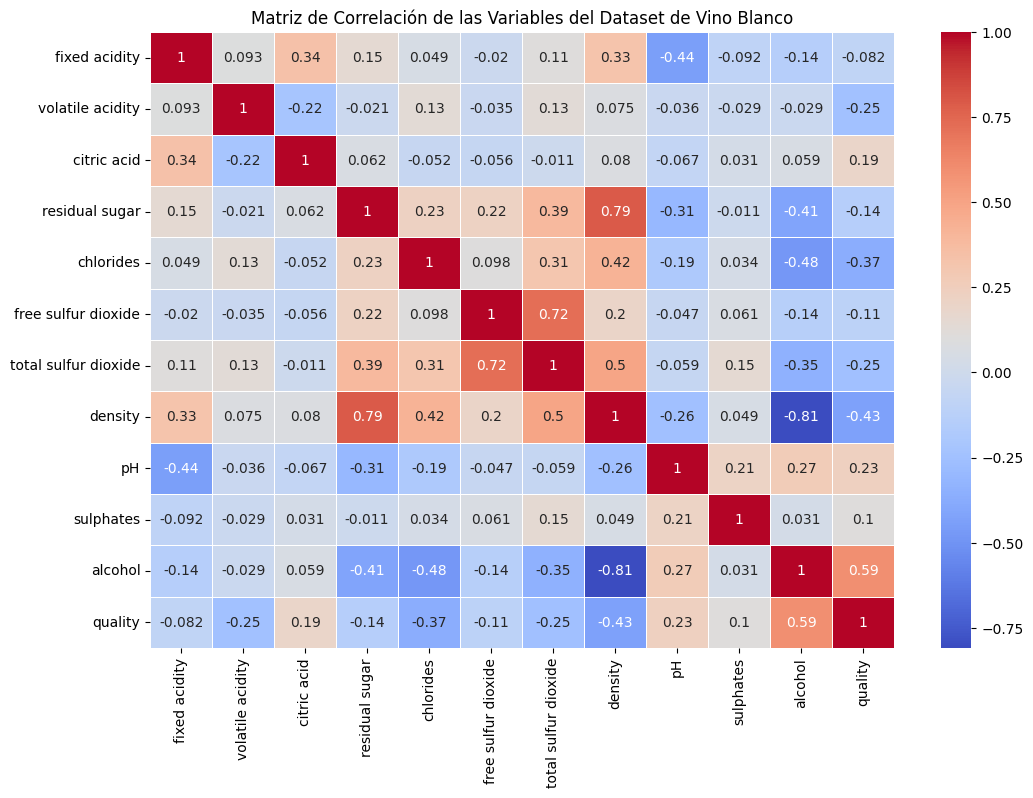

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset balanceado
file_path = 'wine-quality-white-balanced.csv'

try:
    data = pd.read_csv(file_path)
    print("Dataset cargado correctamente.")
except FileNotFoundError:
    print(f"El archivo {file_path} no se encuentra en la ruta especificada.")
    raise
except pd.errors.EmptyDataError:
    print(f"El archivo {file_path} está vacío.")
    raise
except pd.errors.ParserError:
    print(f"Error al analizar el archivo {file_path}.")
    raise
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo {file_path}: {e}")
    raise

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables del Dataset de Vino Blanco')
plt.show()

Dataset cargado correctamente.


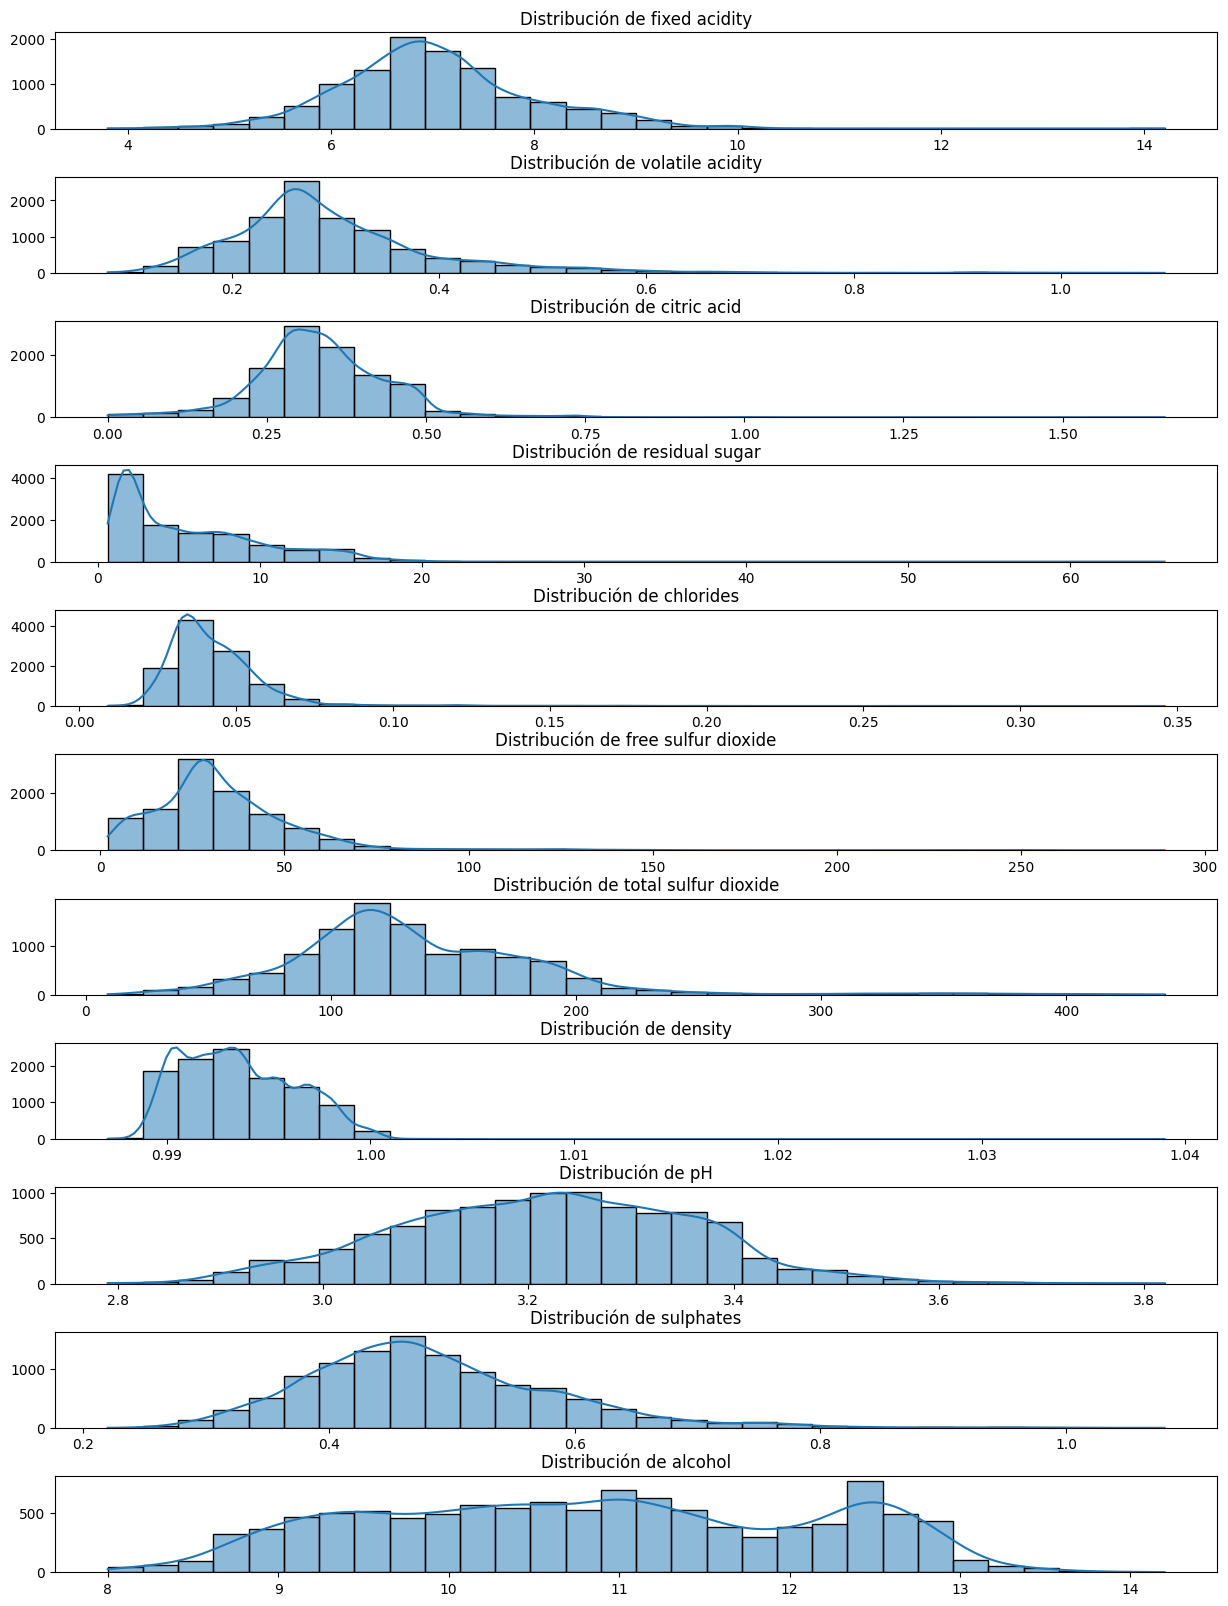

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset balanceado
file_path = 'wine-quality-white-balanced.csv'

try:
    data = pd.read_csv(file_path)
    print("Dataset cargado correctamente.")
except FileNotFoundError:
    print(f"El archivo {file_path} no se encuentra en la ruta especificada.")
    raise
except pd.errors.EmptyDataError:
    print(f"El archivo {file_path} está vacío.")
    raise
except pd.errors.ParserError:
    print(f"Error al analizar el archivo {file_path}.")
    raise
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo {file_path}: {e}")
    raise

# Listar las variables (columnas) del dataset
variables = data.columns.tolist()
variables.remove('quality')  # Remover la columna 'quality' si no deseas incluirla

# Configurar los gráficos
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

# Graficar la distribución de cada variable
for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel('')
    plt.ylabel('')

plt.show()

Accuracy: 0.5080495356037151
              precision    recall  f1-score   support

           3       0.51      0.43      0.47       478
           4       0.50      0.58      0.54       453
           5       0.43      0.44      0.43       474
           6       0.30      0.23      0.26       443
           7       0.41      0.28      0.34       458
           8       0.50      0.57      0.54       446
           9       0.72      1.00      0.84       478

    accuracy                           0.51      3230
   macro avg       0.48      0.50      0.49      3230
weighted avg       0.49      0.51      0.49      3230



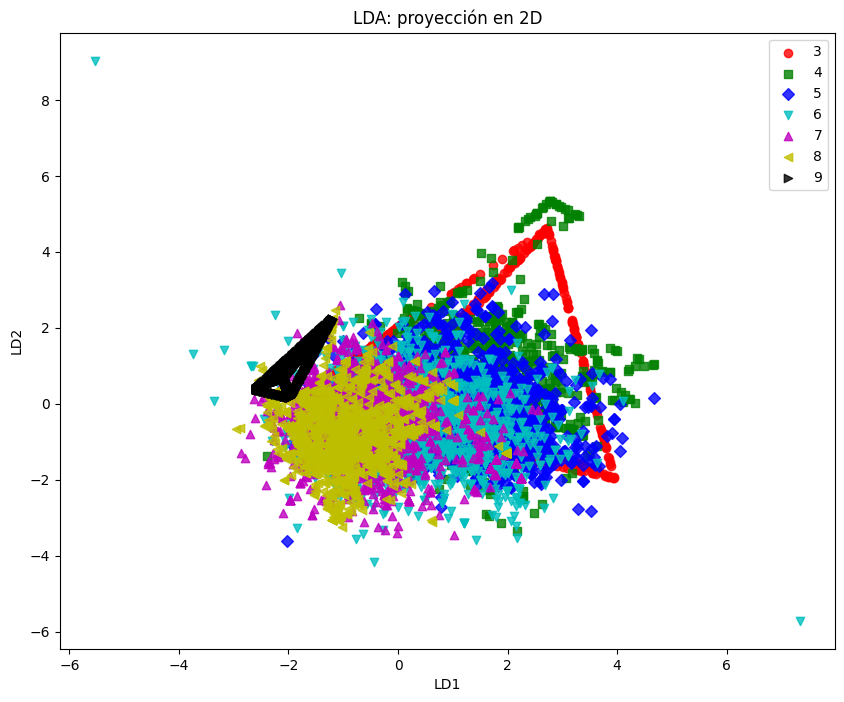

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'wine-quality-white-balanced.csv'
data = pd.read_csv(file_path)

# Separar características y etiquetas
X = data.drop('quality', axis=1)
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el modelo de Análisis Discriminante Lineal
lda = LinearDiscriminantAnalysis()

# Entrenar el modelo
lda.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = lda.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Reducir la dimensionalidad a 2D para visualización
lda_2d = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda_2d.fit_transform(X, y)

# Crear un DataFrame con los datos proyectados
df_lda_2d = pd.DataFrame(X_r2, columns=['LD1', 'LD2'])
df_lda_2d['quality'] = y

# Visualizar los datos proyectados
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
markers = ['o', 's', 'D', 'v', '^', '<', '>']
for i, target_name in enumerate(sorted(data['quality'].unique())):
    plt.scatter(df_lda_2d[df_lda_2d['quality'] == target_name]['LD1'],
                df_lda_2d[df_lda_2d['quality'] == target_name]['LD2'],
                alpha=0.8, color=colors[i], marker=markers[i], label=target_name)
plt.legend()
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA: proyección en 2D')
plt.show()

Accuracy: 0.4696594427244582
              precision    recall  f1-score   support

           3       0.60      0.36      0.45       478
           4       0.49      0.53      0.51       453
           5       0.37      0.48      0.42       474
           6       0.30      0.10      0.15       443
           7       0.25      0.28      0.26       458
           8       0.39      0.60      0.47       446
           9       0.89      0.92      0.90       478

    accuracy                           0.47      3230
   macro avg       0.47      0.47      0.45      3230
weighted avg       0.47      0.47      0.46      3230



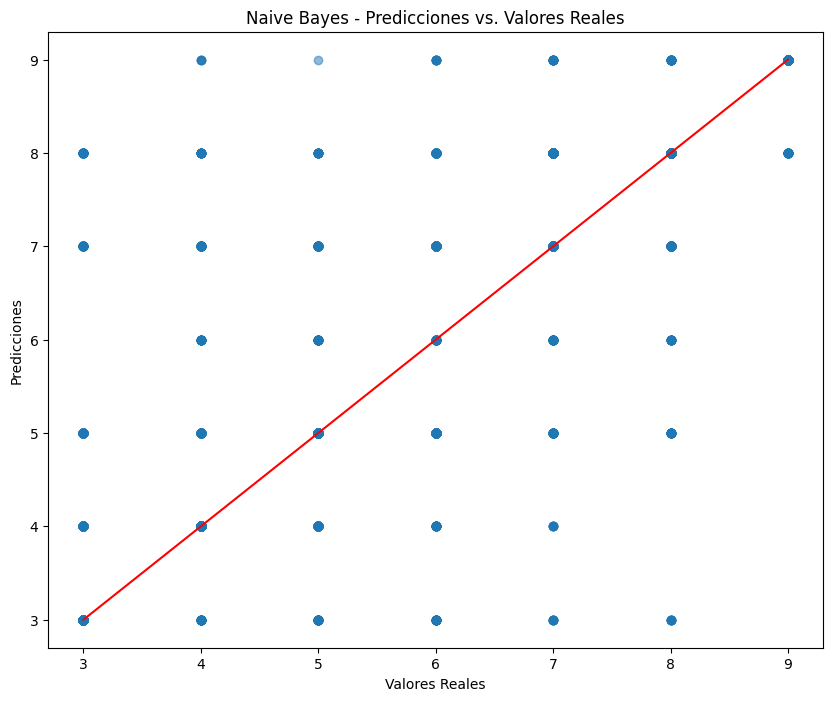

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Cargar el dataset
file_path = 'wine-quality-white-balanced.csv'
data = pd.read_csv(file_path)

# Separar características y etiquetas
X = data.drop('quality', axis=1)
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el modelo de Naive Bayes
nb = GaussianNB()

# Entrenar el modelo
nb.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualización de las predicciones vs. valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Naive Bayes - Predicciones vs. Valores Reales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea de identidad
plt.show()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores Hiperparámetros encontrados por Grid Search para k-NN:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Resultados con los mejores hiperparámetros para k-NN:
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       478
           4       0.85      0.98      0.91       453
           5       0.77      0.70      0.73       474
           6       0.71      0.50      0.59       443
           7       0.79      0.83      0.81       458
           8       0.88      0.99      0.93       446
           9       1.00      1.00      1.00       478

    accuracy                           0.86      3230
   macro avg       0.85      0.86      0.85      3230
weighted avg       0.85      0.86      0.85      3230



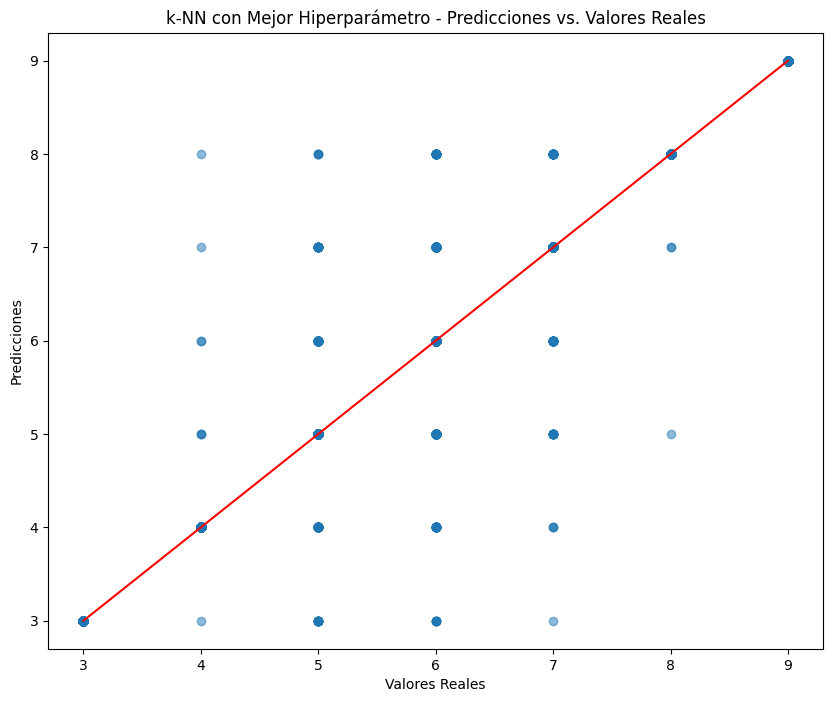

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'wine-quality-white-balanced.csv'
data = pd.read_csv(file_path)

# Separar características y etiquetas
X = data.drop('quality', axis=1)
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo de k-Nearest Neighbors
knn = KNeighborsClassifier()

# Definir la búsqueda de hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrenar el modelo usando la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mejor estimador
best_knn = grid_search.best_estimator_

# Predecir y evaluar el modelo con los mejores hiperparámetros
y_pred = best_knn.predict(X_test)
print("Mejores Hiperparámetros encontrados por Grid Search para k-NN:")
print(grid_search.best_params_)
print("Resultados con los mejores hiperparámetros para k-NN:")
print(classification_report(y_test, y_pred))

# Visualización de las predicciones vs. valores reales
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("k-NN con Mejor Hiperparámetro - Predicciones vs. Valores Reales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea de identidad
plt.show()

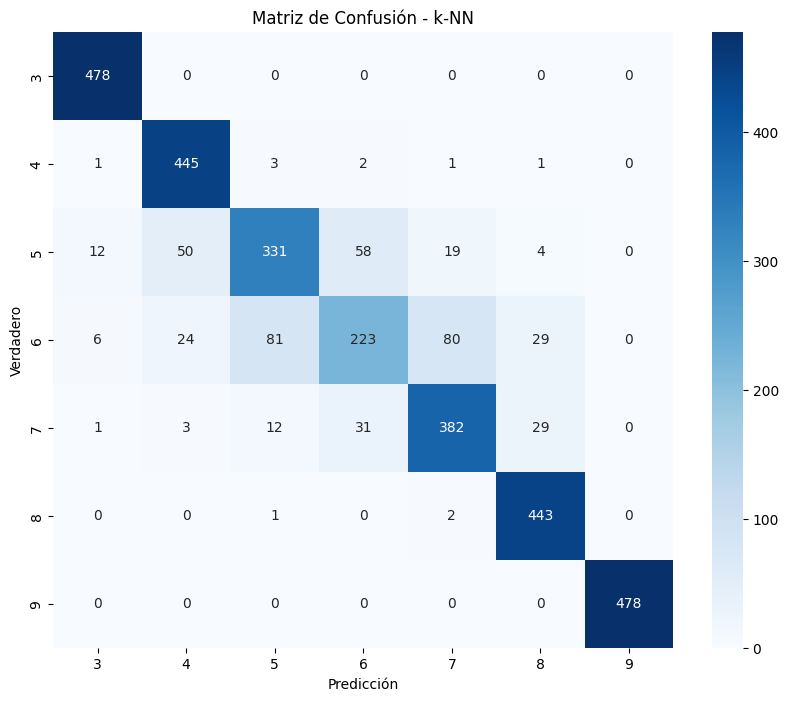

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(data['quality'].unique()), yticklabels=sorted(data['quality'].unique()))
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - k-NN')
plt.show()

Resultados con LDA y Naive Bayes:
Accuracy: 0.4473684210526316
              precision    recall  f1-score   support

           3       0.27      0.17      0.21       478
           4       0.42      0.41      0.41       453
           5       0.38      0.55      0.45       474
           6       0.37      0.17      0.23       443
           7       0.27      0.21      0.23       458
           8       0.44      0.65      0.52       446
           9       0.78      0.96      0.86       478

    accuracy                           0.45      3230
   macro avg       0.42      0.44      0.42      3230
weighted avg       0.42      0.45      0.42      3230



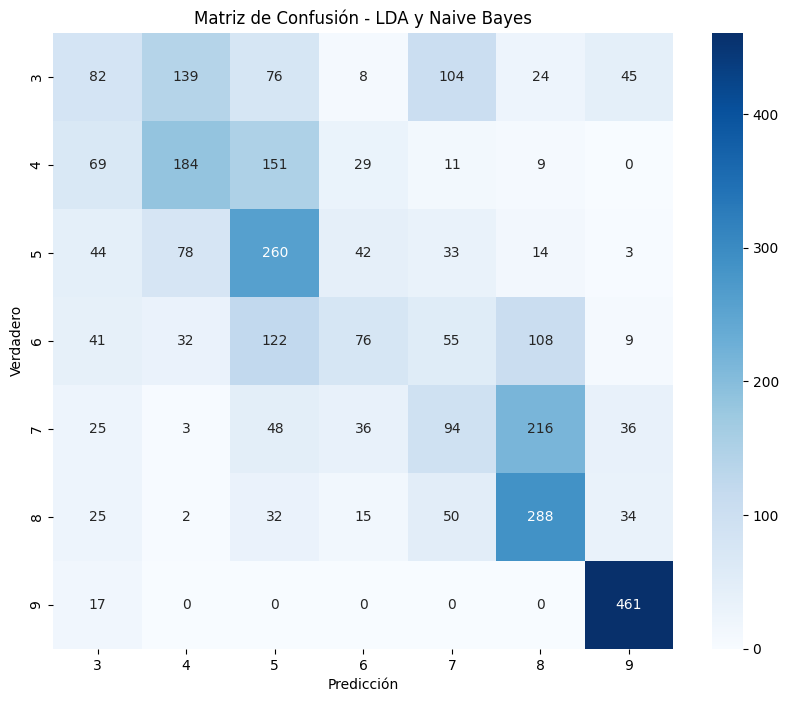

Resultados con Naive Bayes:
Accuracy: 0.4674922600619195
              precision    recall  f1-score   support

           3       0.60      0.36      0.45       478
           4       0.49      0.53      0.51       453
           5       0.37      0.48      0.42       474
           6       0.28      0.09      0.14       443
           7       0.25      0.27      0.26       458
           8       0.39      0.61      0.47       446
           9       0.89      0.91      0.90       478

    accuracy                           0.47      3230
   macro avg       0.47      0.46      0.45      3230
weighted avg       0.47      0.47      0.45      3230



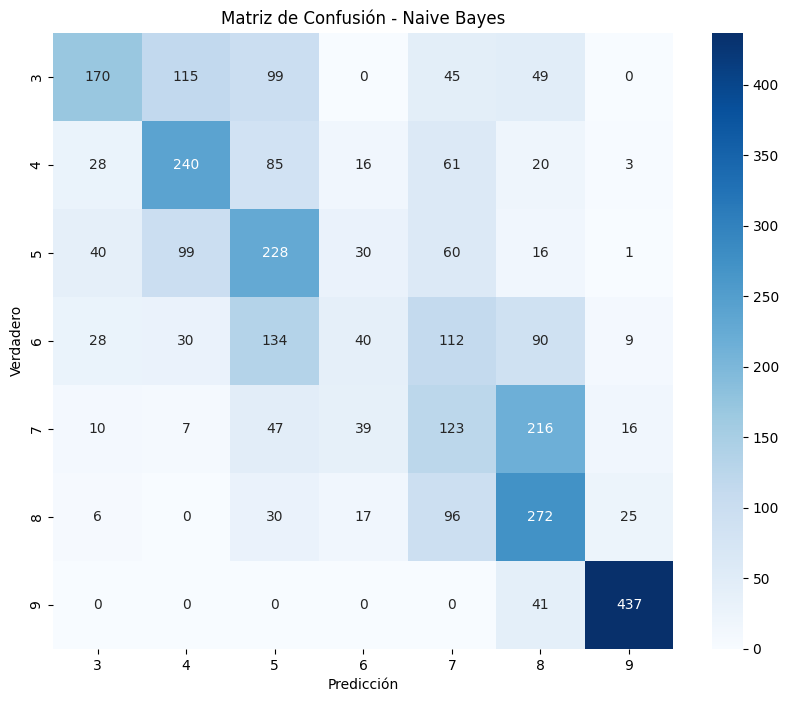

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'wine-quality-white-balanced.csv'
data = pd.read_csv(file_path)

# Separar características y etiquetas
X = data.drop('quality', axis=1)
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Entrenar y evaluar con LDA
lda_model = GaussianNB()
lda_model.fit(X_train_lda, y_train)
y_pred_lda = lda_model.predict(X_test_lda)

print("Resultados con LDA y Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

# Visualización de la matriz de confusión para LDA
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lda, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(data['quality'].unique()), yticklabels=sorted(data['quality'].unique()))
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - LDA y Naive Bayes')
plt.show()

# Aplicar Naive Bayes directamente
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Resultados con Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Visualización de la matriz de confusión para Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(data['quality'].unique()), yticklabels=sorted(data['quality'].unique()))
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores Hiperparámetros encontrados por Grid Search para k-NN con PCA:
{'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Resultados con los mejores hiperparámetros para k-NN con PCA:
              precision    recall  f1-score   support

           3       0.97      1.00      0.98       478
           4       0.85      0.98      0.91       453
           5       0.75      0.69      0.72       474
           6       0.67      0.48      0.56       443
           7       0.79      0.82      0.80       458
           8       0.86      0.99      0.92       446
           9       1.00      1.00      1.00       478

    accuracy                           0.85      3230
   macro avg       0.84      0.85      0.84      3230
weighted avg       0.84      0.85      0.84      3230



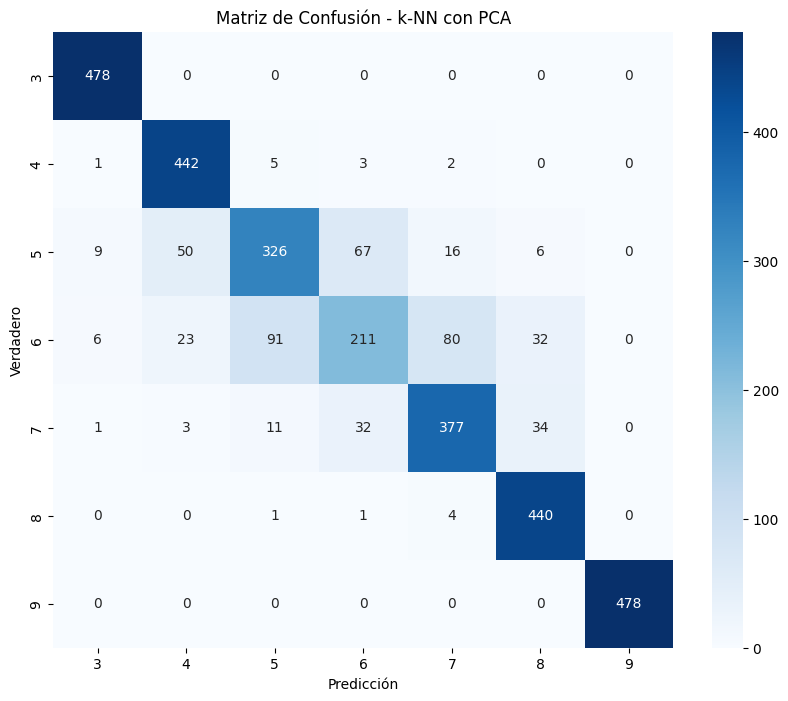

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Crear una tubería que incluye PCA y k-NN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Mantener el 95% de la varianza
    ('knn', KNeighborsClassifier())
])

# Definir la búsqueda de hiperparámetros para la tubería
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrenar el modelo usando la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mejor estimador
best_knn_pca = grid_search.best_estimator_

# Predecir y evaluar el modelo con los mejores hiperparámetros
y_pred = best_knn_pca.predict(X_test)
print("Mejores Hiperparámetros encontrados por Grid Search para k-NN con PCA:")
print(grid_search.best_params_)
print("Resultados con los mejores hiperparámetros para k-NN con PCA:")
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(data['quality'].unique()), yticklabels=sorted(data['quality'].unique()))
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - k-NN con PCA')
plt.show()

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores Hiperparámetros encontrados por Grid Search para Random Forest:
{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Resultados con los mejores hiperparámetros para Random Forest:
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       478
           4       0.94      0.97      0.96       453
           5       0.80      0.78      0.79       474
           6       0.70      0.63      0.66       443
           7       0.82      0.85      0.84       458
           8       0.93      0.97      0.95       446
           9       1.00      1.00      1.00       478

    accuracy                           0.89      3230
   macro avg       0.88      0.89      0.88      3230
weighted avg       0.88      0.89      0.89      3230



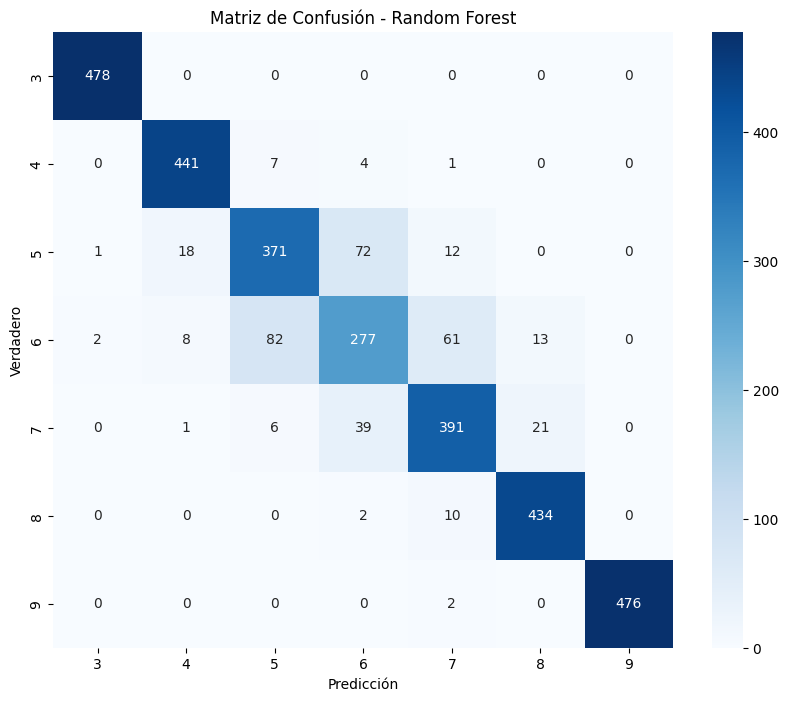

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'wine-quality-white-balanced.csv'
data = pd.read_csv(file_path)

# Separar características y etiquetas
X = data.drop('quality', axis=1)
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir la búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar la búsqueda de hiperparámetros
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrenar el modelo usando la búsqueda de hiperparámetros
grid_search_rf.fit(X_train, y_train)

# Mejor estimador
best_rf = grid_search_rf.best_estimator_

# Predecir y evaluar el modelo con los mejores hiperparámetros
y_pred_rf = best_rf.predict(X_test)
print("Mejores Hiperparámetros encontrados por Grid Search para Random Forest:")
print(grid_search_rf.best_params_)
print("Resultados con los mejores hiperparámetros para Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Visualización de la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(data['quality'].unique()), yticklabels=sorted(data['quality'].unique()))
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

Variables más correlacionadas con la calidad del vino:
alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
Name: quality, dtype: float64


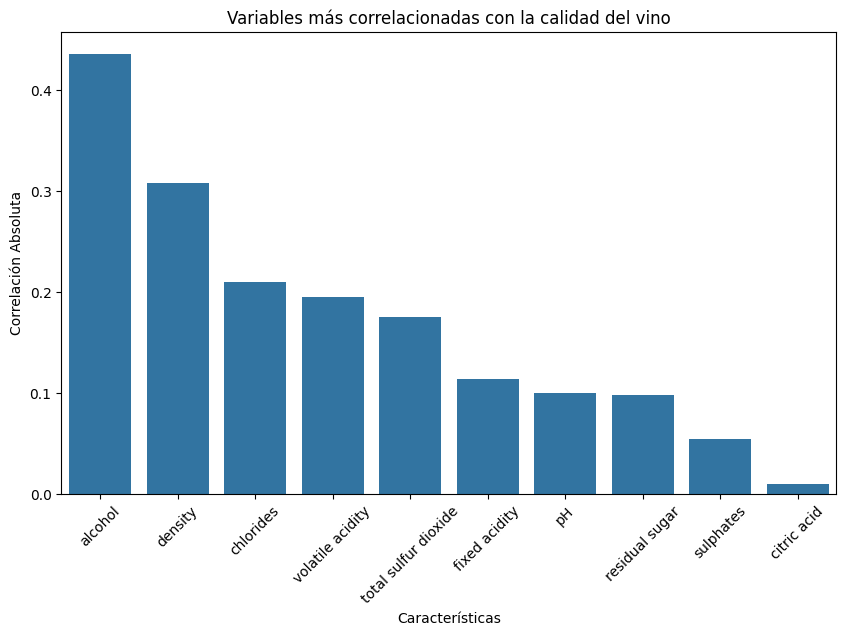

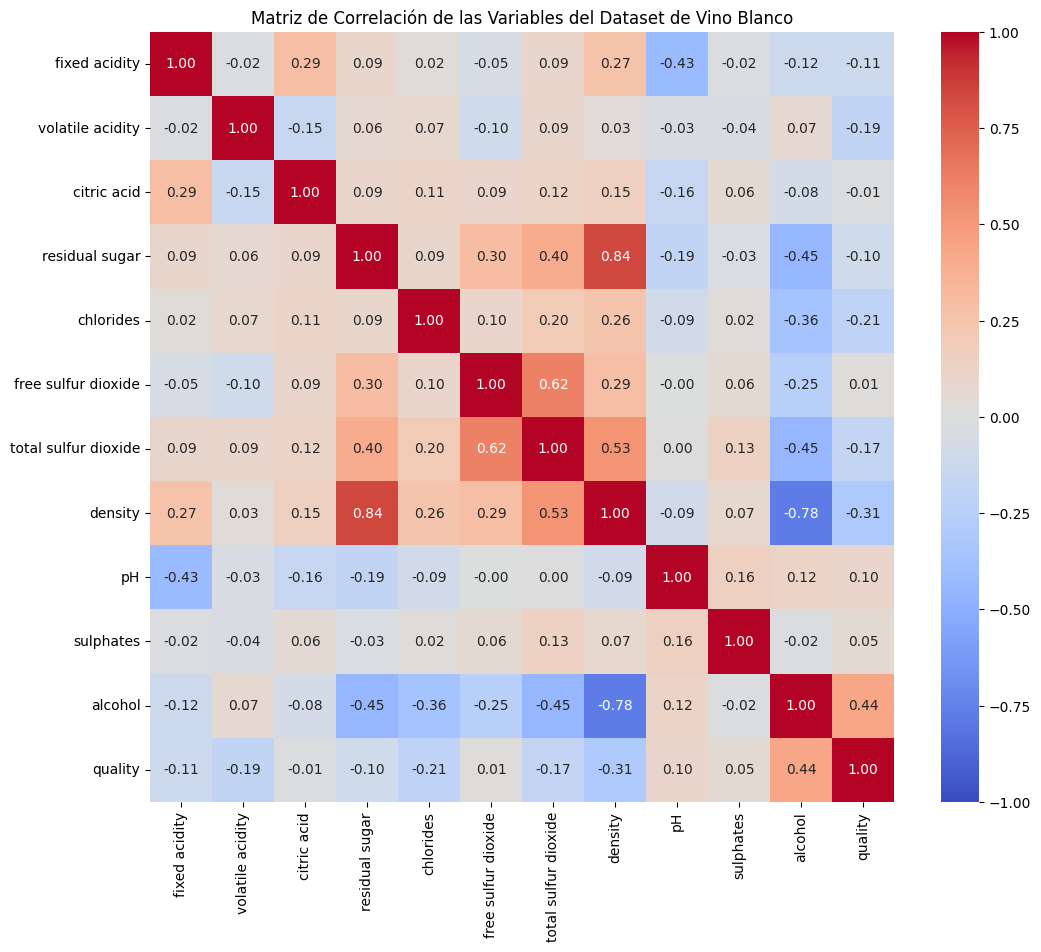

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'winequality-white.csv'  # Asegúrate de que esta es la ruta correcta a tu archivo
data = pd.read_csv(file_path, sep=';')

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Extraer las correlaciones con la variable 'quality'
quality_correlations = correlation_matrix['quality'].drop('quality')

# Ordenar las correlaciones de mayor a menor
quality_correlations_sorted = quality_correlations.abs().sort_values(ascending=False)

# Seleccionar las variables más correlacionadas
top_correlated_features = quality_correlations_sorted.head(10)

# Imprimir las variables más correlacionadas
print("Variables más correlacionadas con la calidad del vino:")
print(top_correlated_features)

# Graficar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlated_features.index, y=top_correlated_features.values)
plt.title('Variables más correlacionadas con la calidad del vino')
plt.ylabel('Correlación Absoluta')
plt.xlabel('Características')
plt.xticks(rotation=45)
plt.show()

# Graficar la matriz de correlación completa para referencia
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de las Variables del Dataset de Vino Blanco')
plt.show()
